In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utility.analysis_parameters as ap
from utility import load, load01deg, util

In [4]:
t15 = 287
t3 = 23
olr, _ = load.get_olr_alb("FV3", "TWP")
olr = olr[t3]
iwp = (load.get_iwp("FV3","TWP", ice_only=False)[t15])*1000 #[t]
swu = load.get_swu("FV3","TWP")[t3]
swd = load.get_swd("FV3","TWP")[t15]
lwp = load.get_lwp("FV3","TWP")[t15]*1000 #[t]*1000
alb = (swu/swd.values)



Getting olr and albedo for FV3 TWP:
(320, 342, 341) (304, 342, 341)
... Getting fwp for FV3 in the TWP region ...
returned swu 3 hrly


In [5]:
iwp.time.values, olr.time.values, alb.time.values, swu.time.values, swd.time.values, lwp.time.values

(numpy.datetime64('2016-08-06T00:00:00.000000000'),
 numpy.datetime64('2016-08-06T00:00:00.000000000'),
 numpy.datetime64('2016-08-06T00:00:00.000000000'),
 numpy.datetime64('2016-08-06T00:00:00.000000000'),
 numpy.datetime64('2016-08-06T00:00:00.000000000'),
 numpy.datetime64('2016-08-06T00:00:00.000000000'))

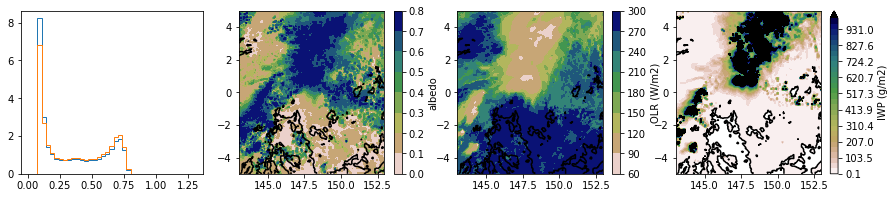

In [6]:
cld_mask = np.where(iwp>=0.1,1,0)

# explore weird albedo values
fig, [ax0,ax1, ax2, ax3] = plt.subplots(1,4,figsize=(15,3))
# albedo histogram 
# all sky and cloud only
alb_bins = np.linspace(0.01, 1.3, 40)
ax0.hist(alb.values.flatten(), density=True, bins=alb_bins, histtype="step")
alb_cldy = np.where(cld_mask, alb.values, np.nan).flatten()
ax0.hist(alb_cldy[~np.isnan(alb_cldy)], density=True, bins=alb_bins, histtype="step")
# albedo in space
# contour = cloud boundaries
cs = ax1.contourf(alb.grid_xt, alb.grid_yt, alb, cmap="gist_earth_r")
ax1.contour(alb.grid_xt, alb.grid_yt, cld_mask, levels=[0.5], colors="k")
plt.colorbar(cs, ax=ax1, label="albedo")

cs = ax2.contourf(olr.grid_xt, olr.grid_yt, olr, cmap="gist_earth_r")
ax2.contour(olr.grid_xt, olr.grid_yt, cld_mask, levels=[1], colors="k")
plt.colorbar(cs, ax=ax2, label="OLR (W/m2)")

cs = ax3.contourf(iwp.grid_xt, iwp.grid_yt, iwp, levels=np.linspace(0.1,1000,30), cmap="gist_earth_r", extend="max")
ax3.contour(iwp.grid_xt, iwp.grid_yt, cld_mask, levels=[1], colors="k")
plt.colorbar(cs, ax=ax3, label="IWP (g/m2)")

plt.savefig("../plots/case_study_fv3/histograms/albedo_t24_exploration.png")
plt.show()


In [7]:
# flatten arrays and get rid of clear sky columsn
cld_mask = np.where(iwp.values.flatten()>=0.1,1,0)
print(cld_mask.shape)
iwp = np.where(cld_mask, iwp.values.flatten(), np.nan)
olr = np.where(cld_mask, olr.values.flatten(), np.nan)
swu = np.where(cld_mask, swu.values.flatten(), np.nan)
swd = np.where(cld_mask, swd.values.flatten(), np.nan)
lwp = np.where(cld_mask, lwp.values.flatten(), np.nan)
alb = np.where(cld_mask, alb.values.flatten(), np.nan)
print(iwp.shape)

nan_mask = np.where(np.isnan(iwp),False,True)
iwp = iwp[nan_mask]
olr = olr[nan_mask]
swu = swu[nan_mask]
swd = swd[nan_mask]
lwp = lwp[nan_mask]
alb = alb[nan_mask]




(116622,)
(116622,)


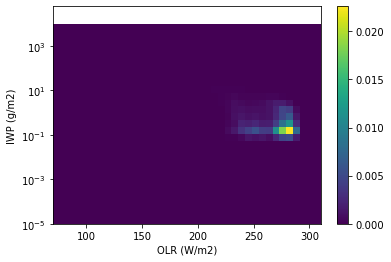

In [8]:
# scatter plot of olr and iwp
plt.hist2d(olr, iwp, 
    # bins=40,
    bins=[np.linspace(70,310,40), np.logspace(-5,4,30)], 
    cmap="viridis", density=True)
plt.colorbar()
plt.xlim([70,310])
plt.ylim([1e-5,6e4])
plt.xlabel("OLR (W/m2)")
plt.ylabel("IWP (g/m2)")
plt.yscale("log")
# plt.savefig(f"../plots/case_study_fv3/histograms/IWPvOLR_t{t//16}_log.png")
# plt.savefig(f"../plots/case_study_fv3/histograms/IWPvOLR_t{t//16}_linear.png")
# plt.savefig(f"../plots/case_study_fv3/histograms/IWPvOLR_t_all_log.png")
plt.show()


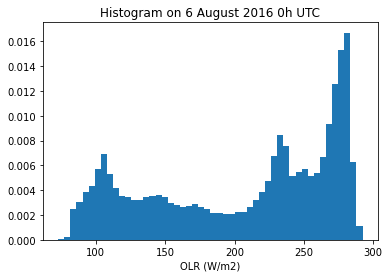

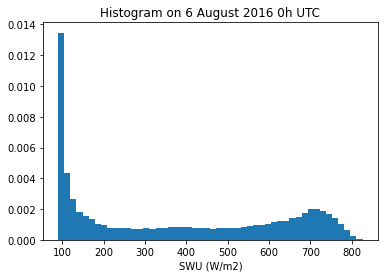

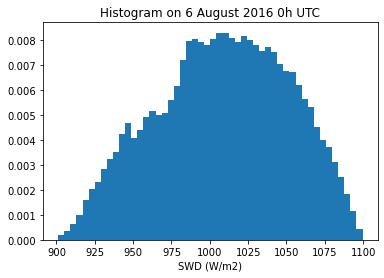

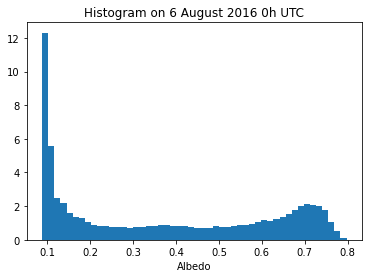

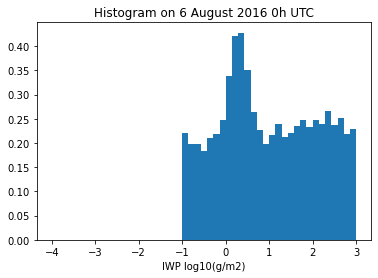

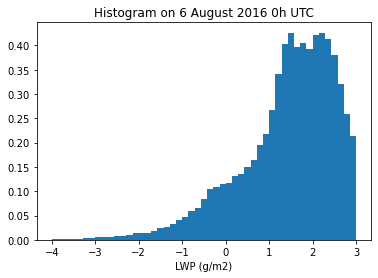

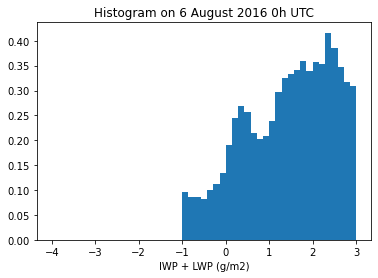

In [9]:
if ((t3%8)*3+3)%24==0:
    title_string = f"Histogram on {(t3+16)//8+2} August 2016 {((t3%8)*3+3)%24}h UTC"
else:
    title_string = f"Histogram on {(t3+16)//8+1} August 2016 {((t3%8)*3+3)%24}h UTC"
# title_string = "Histogram all time (excluding 2-day spin-up)"
# t0="all"
t0=t3
plt.hist(olr, bins=50, density=1)
plt.xlabel("OLR (W/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/OLR_hist_t{t0}.png")
plt.show()
plt.hist(swu, bins=50, density=1)
plt.xlabel("SWU (W/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/SWU_hist_t{t0}.png")
plt.show()
plt.hist(swd, bins=50, density=1)
plt.xlabel("SWD (W/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/SWD_hist_t{t0}.png")
plt.show()
plt.hist(alb, bins=50, density=1)
plt.xlabel("Albedo")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/ALBEDO_hist_t{t0}.png")
plt.show()
plt.hist(np.log10(iwp), bins=np.linspace(-4,3,50), density=1)
plt.xlabel("IWP log10(g/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/IWP_hist_t{t0}.png")
plt.show()
plt.hist(np.log10(lwp), bins=np.linspace(-4,3,50), density=1)
plt.xlabel("LWP (g/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/LWP_hist_t{t0}.png")
plt.show()
plt.hist(np.log10((iwp+lwp)), bins=np.linspace(-4,3,50), density=1)
plt.xlabel("IWP + LWP (g/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/IWP+LWP_hist_t{t0}.png")
plt.show()


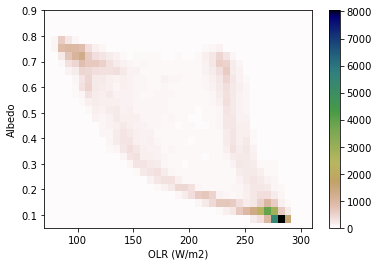

In [10]:
# scatter plot of olr and albedo
plt.hist2d(olr, swu/swd, 
    # bins=40,
    bins=[np.linspace(70,310,40), np.linspace(0.01,0.95,32)], 
    cmap="gist_earth_r", density=False)
plt.colorbar()
plt.xlim([70,310])
plt.ylim([0.05,0.9])
plt.xlabel("OLR (W/m2)")
plt.ylabel("Albedo")
plt.savefig(f"ALB-OLR_cldy_t{t0}.png")
plt.show()

In [11]:
import xarray as xr

swp = xr.open_dataset(ap.TWP_FV3_SWP)["intqs"][t15].values.flatten()*1000
gwp = xr.open_dataset(ap.TWP_FV3_GWP)["intqg"][t15].values.flatten()*1000
iwp = xr.open_dataset(ap.TWP_FV3_IWP)["intqi"][t15].values.flatten()*1000

fwp = iwp + swp + gwp

swp = np.where(fwp>0.1, swp, np.nan)
gwp = np.where(fwp>0.1, gwp, np.nan)
iwp = np.where(fwp>0.1, iwp, np.nan)

nan_mask = ~np.isnan(swp)
swp = swp[nan_mask]
gwp = gwp[nan_mask]
iwp = iwp[nan_mask]
bins = np.logspace(-1,4,30)
plt.figure()
plt.hist(iwp, bins=bins, histtype="step", label="ice", density=False)
plt.hist(swp, bins=bins, histtype="step", label="snow", density=False)
plt.hist(gwp, bins=bins, histtype="step", label="graupel", density=False)
plt.hist(fwp, bins=bins, histtype="step", label="total", density=False)
plt.xscale("log")
plt.legend()
plt.show()


NameError: name 't' is not defined

In [10]:
print(f"means {t0}\n\tOLR {np.min(olr).values}\n\tIWP {np.min(iwp).values}\n\tSWU {np.min(swu).values}\n\tSWD {np.min(swd).values}\n\tLWP {np.min(lwp).values}\n\t(IWP+LWP) {np.min(iwp+lwp).values}")


means all
	OLR 236.47509765625
	IWP 275.7802734375
	SWU 112.56120300292969
	SWD 413.71026611328125
	LWP 92.07524871826172
	(IWP+LWP) 367.8554382324219


In [11]:
print(f"min\n\tOLR {np.min(olr).values}\n\tIWP {np.min(iwp).values}\n\tSWU {np.min(swu).values}\n\tSWD {np.min(swd).values}\n\tLWP {np.min(lwp).values}\n\t(IWP+LWP){np.min(iwp+lwp).values}")

min
	OLR <xarray.DataArray 'flut' ()>
array(68.53616, dtype=float32)
	IWP <xarray.DataArray ()>
array(-2.3828437e-18, dtype=float32)
	SWU <xarray.DataArray 'fsut' ()>
array(0., dtype=float32)
	SWD <xarray.DataArray 'fsdt' ()>
array(0., dtype=float32)
	LWP <xarray.DataArray 'intql' ()>
array(-2.4687234e-18, dtype=float32)
	(IWP+LWP)<xarray.DataArray ()>
array(-3.2332656e-18, dtype=float32)
